# Wine Analysis

## Introduction

We have in our hands a dataset which covers the chemical compositon of wines from three different cultivars from the same region in Italy. 

These chemicals are:

- Alcohol
- Malic acid
- Ash
- Alcalinity of ash
- Magnesium
- Total phenols
- Flavanoids
- Nonflavanoid phenols
- Proanthocyanins
- Color intensity
- Hue
- OD280/OD315 of diluted wines
- Proline

We will see if we can find any interest insights from it by applying exploratory analysis and clustering techniques.

## Pre-Analysis

Let's say that we are nor wine or chemical experts. Then, it would be useful to have some insights about the attributes that we are working with to have an idea of what we could expect to find out.

### Alcohol
- **Description:** Represents the percentage of alcohol in the wine.
- **Typical Range:** Varies from around 8% to 15%.


### Malic Acid
- **Description:** Organic acid present in grapes. Affects acidity and can influence flavor.
- **Typical Range:** In the range of 0.1 to 5 g/L.



### Ash
- **Description:** Describes the total amount of minerals present in the wine after burning. Can be indicative of wine quality.
- **Typical Range:** Can vary, but typically found in the range of 1.5 to 3 g/L.



### Alcalinity of Ash
- **Description:** Measures the amount of alkali in terms of carbonate equivalent. Related to wine acidity.
- **Typical Range:** Common values are in the range of 10 to 30 mEq/L.



### Magnesium
- **Description:** Concentration of magnesium in the wine.
- **Typical Range:** Can vary, but typical values range between 70 and 162 mg/L.


### Total Phenols
- **Description:** Represents the total concentration of phenolic compounds in the wine, including antioxidants.
- **Typical Range:** Concentrations can vary, but red wines, in particular, may have values in the range of 100 to 300 mg/L.



### Flavanoids
- **Description:** Antioxidant compounds contributing to wine structure, flavor, and color.
- **Typical Range:** Concentrations can vary, but typical values are between 0.5 and 5 mg/L.



### Nonflavanoid Phenols
- **Description:** Another group of phenolic compounds excluding flavonoids.
- **Typical Range:** Concentrations can vary, but typical values are between 0.1 and 1.5 mg/L.



### Proanthocyanins
- **Description:** Antioxidant compounds contributing to astringency and flavor.
- **Typical Range:** Concentrations can vary, but typical values are between 0.5 and 3 mg/L.



### Color Intensity
- **Description:** Measures the intensity of the wine color.
- **Typical Range:** Red wines often have higher values, in the range of 1 to 15.



### Hue
- **Description:** Refers to the color tone of the wine.
- **Typical Range:** Typical values can be in the range of 0.5 to 1.5.



### OD280/OD315 of Diluted Wines
- **Description:** The ratio of optical density at 280 nm to 315 nm. Provides information about wine color concentration and clarity.
- **Typical Range:** Concentrations can vary, but typical values may be in the range of 1 to 4.



### Proline
- **Description:** A measure of proline concentration, an amino acid, in the wine.
- **Typical Range:** Concentrations can vary, but typical values are between 300 and 1680 mg/L.


#### General Observations:

Based on this information, we could expect some attributes to the be nearly correlated:

- The ones that explicity refer to or affect the color: Hue, OD280/OD315, Color Intensity 
- The one that refer to the acid level of each wine: Ash, Alcalinity of Ash, Malic Acid
- And the ones which cuold tell us something about the antioxidantes in the wine: Total Phenols, Flavanoids, Non Flavanoids Phenols

Now, let's get start.

## Analysis

### Import Libraries

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

### Loading the data

In [2]:
path = "data/"
dataset = "wine-clustering.csv"
df = pd.read_csv(path+dataset, sep=",")

In [3]:
df.head() #check that it was correctly loaded

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


### Data Processing

In [4]:
df.shape #(178, 13)

(178, 13)

In [5]:
df.columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


It seems that the data set has no null values and all the attributes have numeric data types.

As we have no categorical variables or strings, there is no necessity to check for misspelling words or encoding problemas. 


The columns names are representative of what they have. The values of their rows, at least based on the previos seaction `.head()` seems to be between the expected ranges (besides `Total_Phenols`, but we can consider that it has a different measurment unit). 



However, it would be convenient to normalize the values for when we reach the clustering section.

### Exploratory Analysis

Let's start checking out a quick description about the range in which our values effectivelly are and how the distribute.

In [7]:
stats = df.describe()

We can do a box plot for each chemical to get a better view

In [41]:
def boxplot_per_chemical(data):
    plt.figure(figsize=(16, 14))
    for i, column in enumerate(data.columns):
        plt.subplot(4, 4, i + 1)
        sns.boxplot(x=data[column])
        mean_value = stats[column]["mean"]
        plt.axvline(x=mean_value, color="red", linestyle="--", label="Mean value")
        plt.legend(loc="upper right",)
        plt.title(f'{column}´s boxplot')
        del mean_value
    plt.tight_layout()
    plt.show()

c:\Users\marti\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\marti\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\marti\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\marti\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

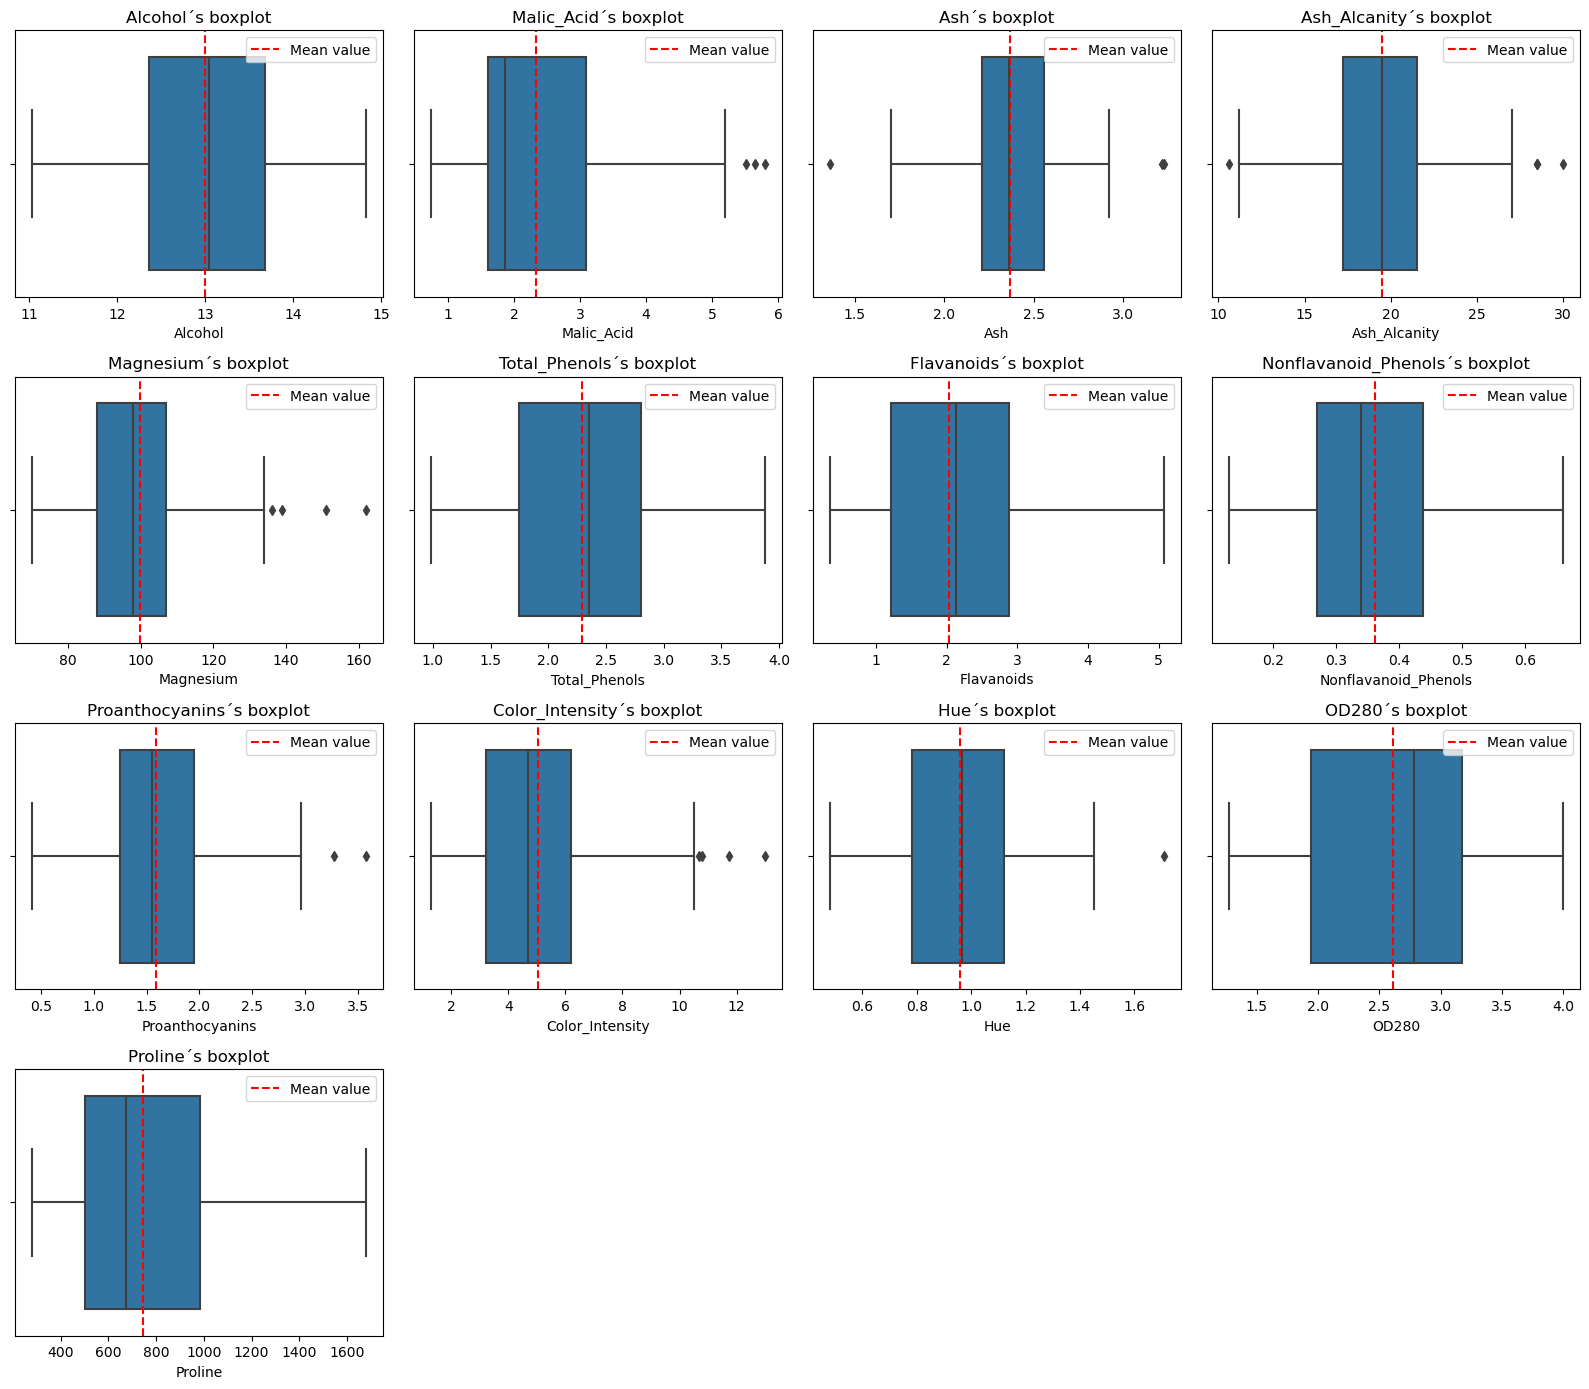

In [42]:
boxplot_per_chemical(df)

We can observe a few things:

- We have some outliers, depending on which clustering method we use, they could (or not) have a notable impact in the results. With one as KMeans, which iterates multiple times reasigning each centroid to its geometric center, it could give us unexpected results, as the outlier could make the center move significantly. In others as DBSCAN, which assigns data that it is proximate to each other to a same cluster, it wouldn't been a problem. However, as we now that the wines come from three different cultivars, one would be tentated to usea KMeans with K=3. In the clustering section we will see how to proceed.

- In the case of Alcohol, it seems that the distribution is simmetric. The median is in the middle and we can see that the 50% of the values wines got values between 12.5 and 13.6 approximately. 

- The Malic Acid doesn't have a simmetric distribution. Half of the wines have values below (approximately) 2 and almost 75% of them have values below 3. Since the boxplot uppershadow has values until 5 and a bit, we can say that its distribution is concentrated to lower values of this chemical. When we explore this particular chemical distribution, it would be interesting to keep this in mind, since the outliers are the ones with the higher values.

- The Ash has relatively simmetrical boxplot, with a few outliers on each side of it. We can see that the body of the box looks more narrow than in the previous chemicals, but this could be because the outliers make the boxplot a bit small. 50% of the rows have values between 1.5 and 2.6.

- The Ash Alcalinity one looks very similar to the previous boxplot, it even has the same amount of outliers: one on the bottom and two on the top. They look very correlated, as we could suspect.

- Magnesium's boxplot is a bit center to the left and has all of its outliers on the right of the plot, they are the ones that has the bigger values, but they are not a lot.

- Total Phenols looks pretty simetric and its doesn´t have any outlier. The body of the Flavanoids and Non-flavanoids boxplot's looks similar to this, but are slightly center to lower values. They also have no outliers.

- Proantochyanins is centered, but it has two outliers on the right.

- Color intensity is moved to the left, we can easily see that approximately 75% of the wines have values below a bit more than 6, but there also outliers with values higher than 10. It seems like there are four of them. Is similar to what happens with Malic Acid.

- We could suppose that the hue boxplot would be similar to the color intensity, but its is very simmetrical, and has only one outlier. It looks more similar to the OD280's one, but this looks wider than it.The OD280's also has its median not pretty centered in the middle of the box body, it is moved to the right. We could expect a bit more than half of the wines to have this chemical's value greater than 2.6

- Lastly, the Proline. It clearly tends to have lower values, as 75% of the wines have less than 1000 units of it. Even if there are 25% of them that have values between 1000 and (approximately) 1700, it doesn´t have any outlier.

We saw that same of the chemicals have a box body centered to one side but also presents outliners on the other one. It would be interesting to see if what happens is that there are wines with considerable lower values than others in these ones and other with considerably higher values, forming two groups.

In [43]:
def kdeplot_per_chemical(data):
    plt.figure(figsize=(16, 14))
    for i, column in enumerate(data.columns):
        plt.subplot(4, 4, i + 1)
        sns.histplot(x=data[column], bins=35, kde=True)
        median_value = data[column].median()
        plt.axvline(x=median_value, color="red", linestyle="--", label="Median value")
        plt.legend(loc="upper right",)
        plt.title(f'{column}´s KDE and Histogram')
        del median_value
    plt.tight_layout()
    plt.show()

c:\Users\marti\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\marti\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\marti\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\marti\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.

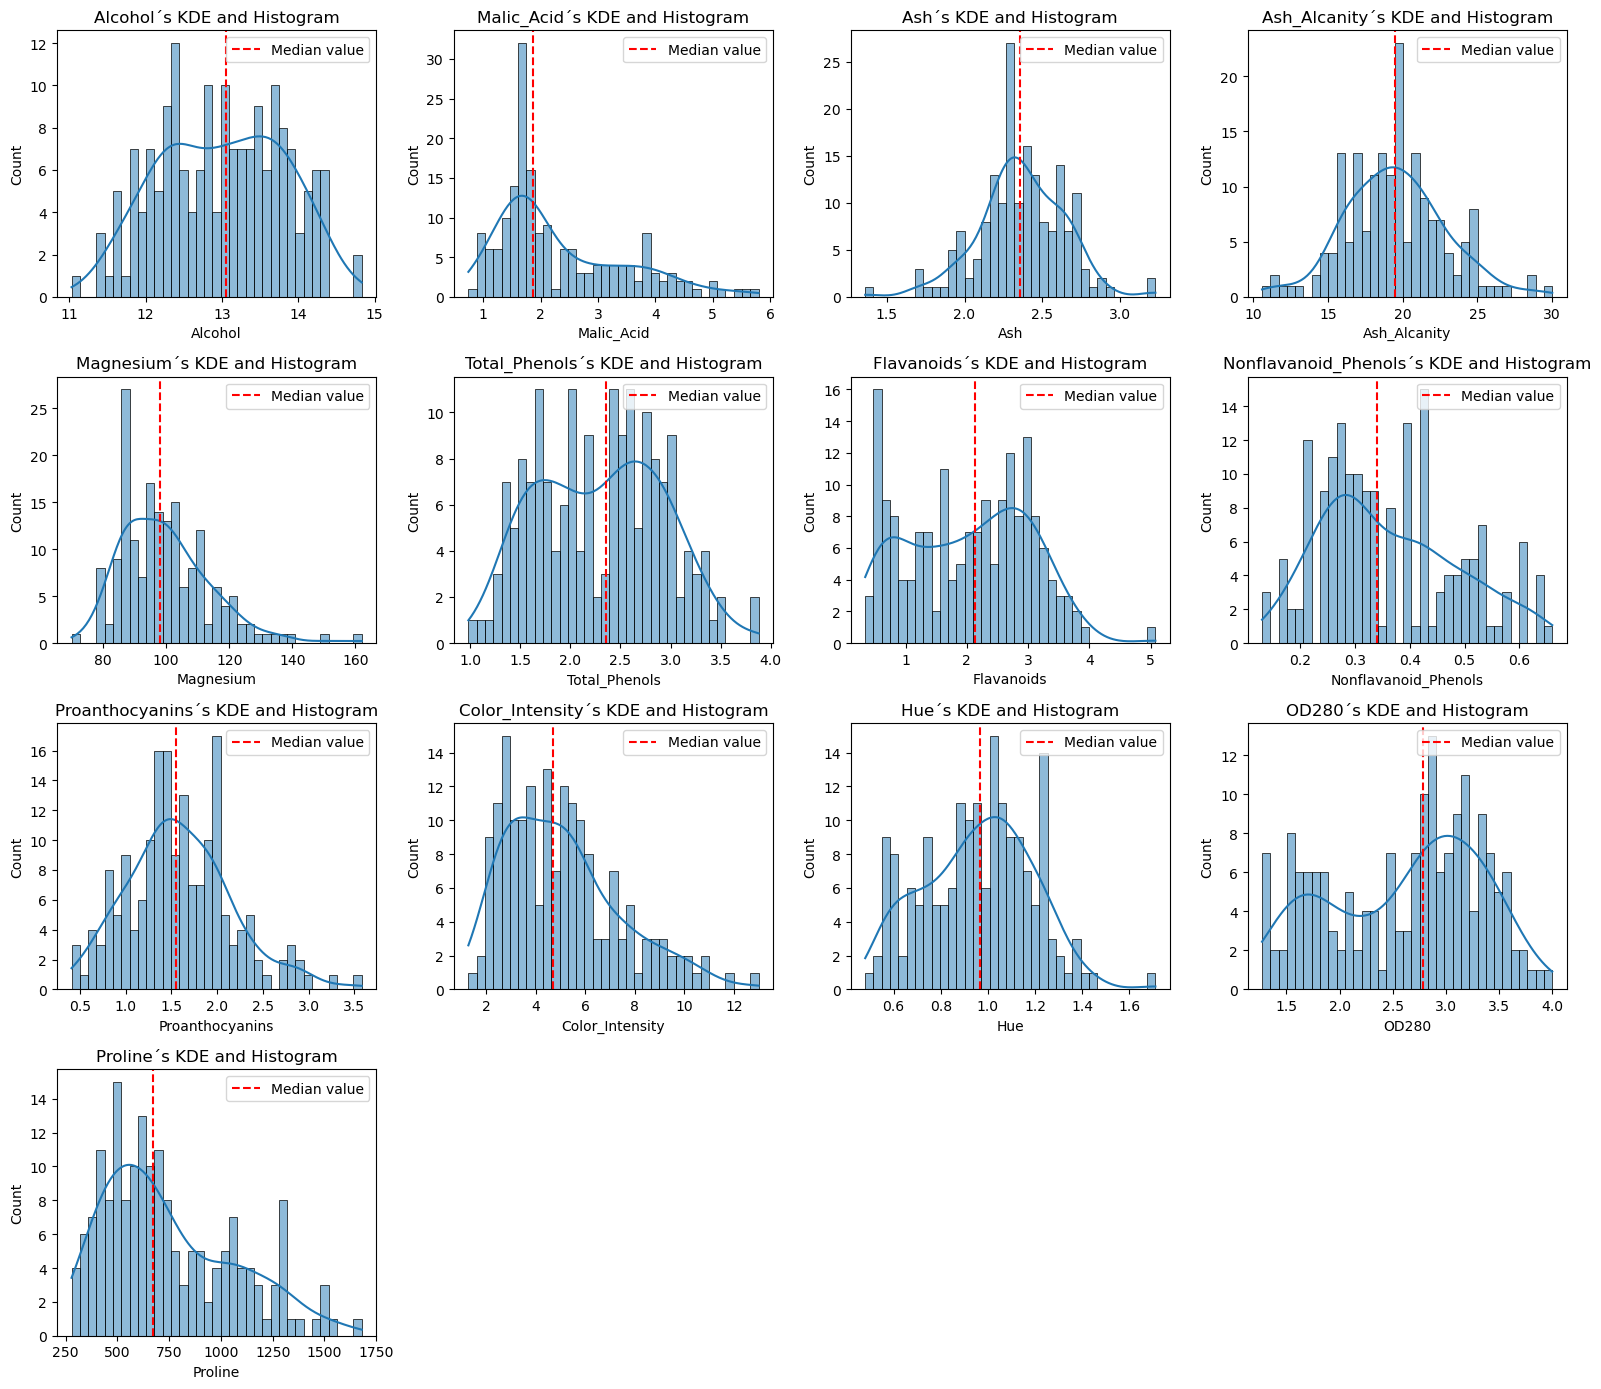

In [44]:
kdeplot_per_chemical(df)

The ones with a clearly left-centered boxplot and some otuliers on the right were the Malic Acid, Magnesium, Proanthocyanins and Color Intensity seem to simply have a distribution centered over lowered values. It seems like the outliers are indeed atypical values. As they are not a lot, maybe we could choose to mere remove them. For now, as they don´t seem to bee extremely away from the rest of the data (none of them really distorsions the hisotgram or the KDEs), we can allow them to be there.

Something more interesting happens with the Total Phenois, Flavonoids and OD280's plots: they seem like if they have slightly two different maxes on their KDE curves, we may sepparate our wines in two different types based on this.

But first, let's see if we can find out any correlations between our variables based on a quantitative value. We can use the correlation matrix to this and see if there is a lineal relation between two of our columns.

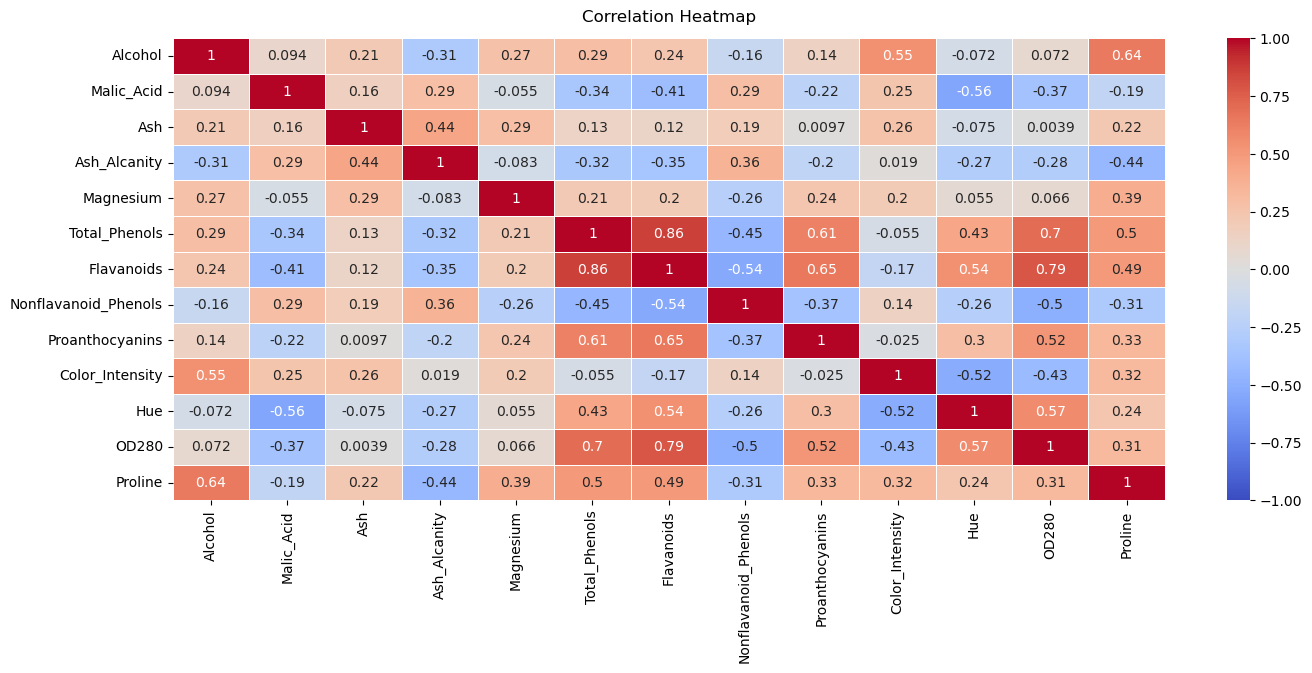

In [12]:
corr_matrix = df.corr()

plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(corr_matrix, vmin=-1, vmax=1, annot=True, linewidths=.5, cmap='coolwarm')

heatmap.set_title('Correlation Heatmap', fontdict={'fontsize': 12}, pad=12)

plt.show()
del heatmap, corr_matrix


In this order, we can see that the strongest correlations are the ones between:

- Total Phenols - Flavanoids: 0.86
- OD280 - Flavanoids: 0.79
- OD280 - Total Phenols: 0.70
- Proanthocyanins - Flavanoids: 0.65
- Proline - Alcohol: 0.64
- Total Phenols - Proanthocyanins: 0.61

Just to consider the ones with an absolute value greater than 0.60.

Now we can plot them and see what we can find out.

In [22]:
def scatter_plot_two_chemicals(x_column, y_column):
    fig, ax = plt.subplots()
    x = df[x_column]
    y = df[y_column]
    sns.scatterplot(x=x, y=y)
    ax.set_xlabel(x_column)
    ax.set_ylabel(y_column)
    fig.legend()
    plt.show()

In [24]:
pairs = [
    ('Total_Phenols', 'Flavanoids'),
    ('OD280', 'Flavanoids'),
    ('OD280', 'Total_Phenols'),
    ('Proanthocyanins', 'Flavanoids'),
    ('Proline', 'Alcohol'),
    ('Total_Phenols', 'Proanthocyanins')
    ]

c:\Users\marti\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\marti\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\marti\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\marti\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

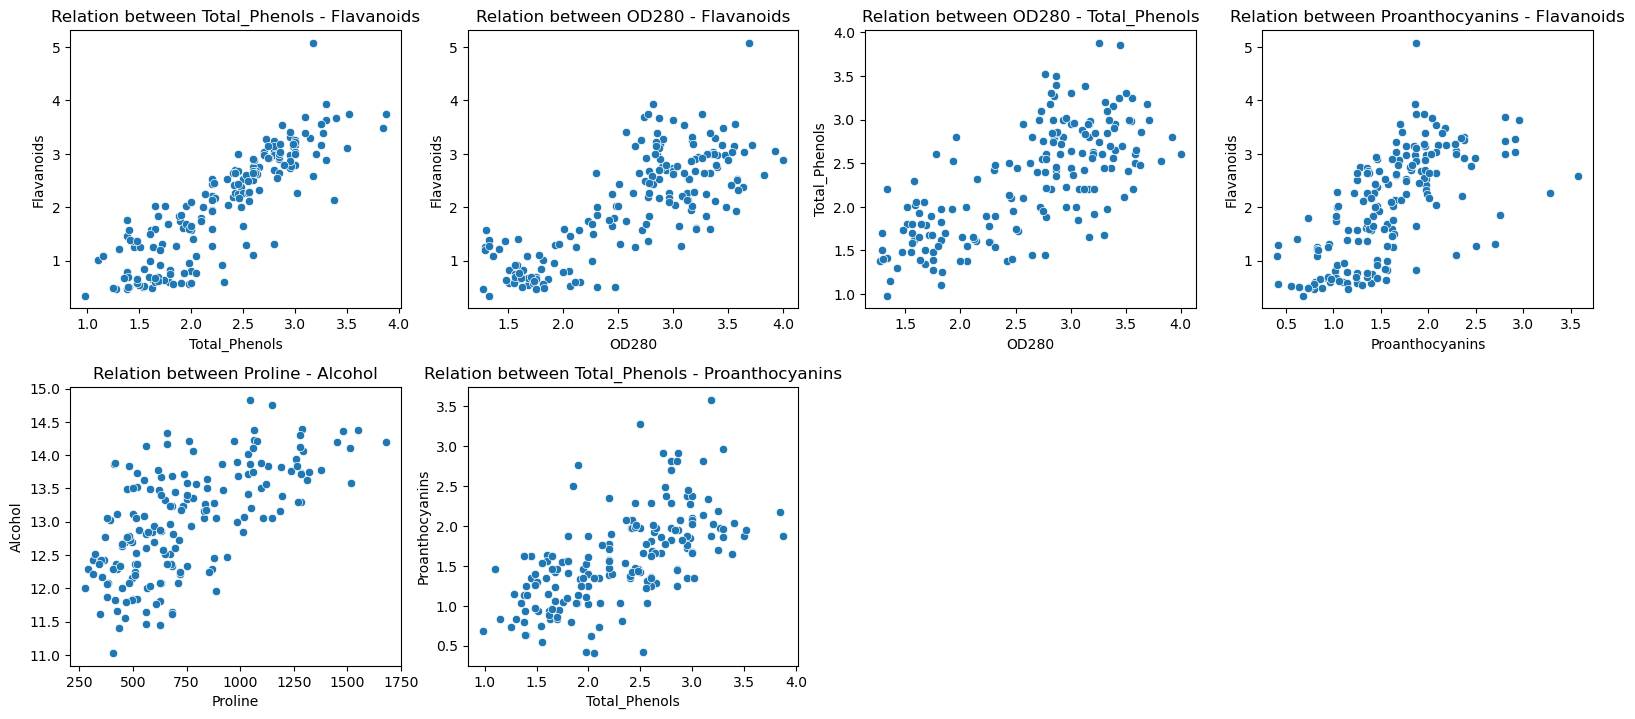

In [26]:
plt.figure(figsize=(16, 14))
for i, tuple in enumerate(pairs):
    plt.subplot(4, 4, i + 1)

    x_column, y_column = tuple

    x = df[x_column]
    y = df[y_column]
    sns.scatterplot(x=x, y=y)

    plt.title(f'Relation between {x_column} - {y_column}')
plt.tight_layout()
plt.show()
del pairs

We can see from left to right and top to bottom that the first plots tend to have a more linear relational than the next ones. 

It is also notable that in the `OD280 - Flavanoids` and `OD280 - Total_Phenols` scatter plots it looks like if there where two clusters or groups. It makes sense that this happens with the `OD280` and those two columns since they have a stronger linear correlation, as we can see in the first plot.

Before, we mentioned that this three attributes had two different peaks in their `KDE` plots and it could lead us to think they would be a good way to get subgroups out of our data. Theses plots back our intuitions.

Evenmore, as the `Flavanois` and the `Total Phenols` are that well correlated, we can think of reduce the dimensionality of those columns to only one and see what happens.

In [50]:
subset_columns = ['Total_Phenols', 'Flavanoids']
df_subset = df[subset_columns]

scaler = StandardScaler() #we normalize their values
df_subset_scaled = scaler.fit_transform(df_subset)

n_components = 1  # we want to get one column out of these two
pca = PCA(n_components=n_components)
df_subset_pca = pca.fit_transform(df_subset_scaled)

df_pca = df.copy()
df_pca.drop(columns=subset_columns, inplace=True)
df_pca["PCA_Phenols_Flavonoids"] = df_subset_pca

In [51]:
df_pca.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,PCA_Phenols_Flavonoids
0,14.23,1.71,2.43,15.6,127,0.28,2.29,5.64,1.04,3.92,1065,1.303775
1,13.20,1.78,2.14,11.2,100,0.26,1.28,4.38,1.05,3.40,1050,0.920849
2,13.16,2.36,2.67,18.6,101,0.30,2.81,5.68,1.03,3.17,1185,1.431559
3,14.37,1.95,2.50,16.8,113,0.24,2.18,7.80,0.86,3.45,1480,2.798708
4,13.24,2.59,2.87,21.0,118,0.39,1.82,4.32,1.04,2.93,735,1.041108


Let´s plot again the correlation matrix, but with this dataframe

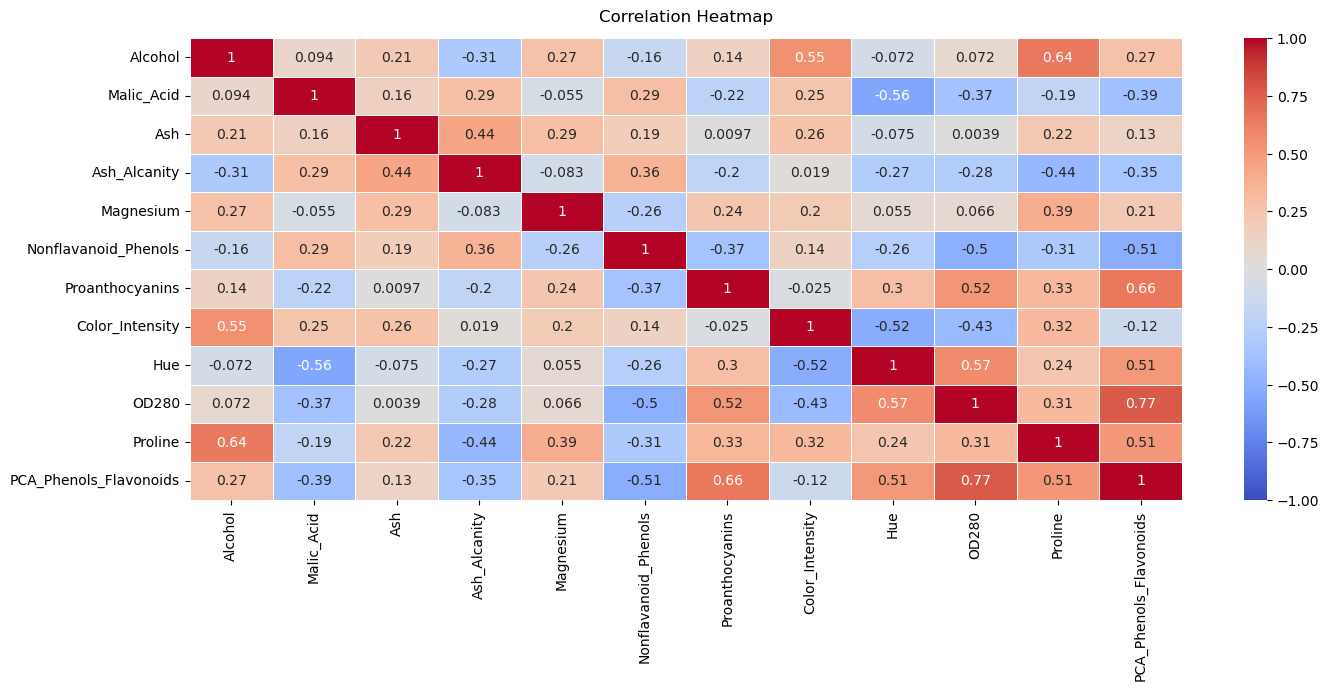

In [52]:
corr_matrix = df_pca.corr()

plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(corr_matrix, vmin=-1, vmax=1, annot=True, linewidths=.5, cmap='coolwarm')

heatmap.set_title('Correlation Heatmap', fontdict={'fontsize': 12}, pad=12)

plt.show()

TODO

### Clustering

## Conclusions